# Notebook for learning Python TSA

## Libraries

In [1]:
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from datetime import date
from datetime import datetime
from datetime import timedelta
from scipy import stats
from getpass import getpass
import os

## Basics - Date

In [2]:
today = date.today()
print(today)

2023-03-25


In [3]:
other_date = date(2023,3,2)
print(other_date)

2023-03-02


In [4]:
now = datetime.now()
print(now)

2023-03-25 19:51:17.306409


In [5]:
some_date = datetime(2023,3,2,20,50,30)
print(some_date)

2023-03-02 20:50:30


In [6]:
some_date.isoformat()

'2023-03-02T20:50:30'

In [7]:
year = timedelta(days =365)
print(year)

365 days, 0:00:00


In [8]:
year*2

datetime.timedelta(days=730)

In [9]:
year = now.strftime("%Y")
print("year:", year)


year: 2023


## Basics Pandas

In [10]:
rg = pd.date_range(start = '2023-01-01',
                   end = '2023-01-30',
                   freq = "D"
                  )
print(rg)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30'],
              dtype='datetime64[ns]', freq='D')


In [11]:
rg = pd.Series(pd.date_range(start = '2023-01-01',
                   end = '2023-01-30',
                   freq = "W"
                  ))
print(rg)

0   2023-01-01
1   2023-01-08
2   2023-01-15
3   2023-01-22
4   2023-01-29
dtype: datetime64[ns]


In [12]:
df = pd.DataFrame({'year':[2021,2022,2023],
                   'month':[3,4,5],
                   'day':[21,22,23]
                  })
df.head()

,year,month,day
0,2021,3,21
1,2022,4,22
2,2023,5,23


In [13]:
ts1 = pd.to_datetime(df)
print(ts1)

0   2021-03-21
1   2022-04-22
2   2023-05-23
dtype: datetime64[ns]


In [14]:
s = pd.Series([1,2,3,4,5])
s.rolling(3).sum()

0     NaN
1     NaN
2     6.0
3     9.0
4    12.0
dtype: float64

In [15]:
rng = pd.date_range(start = '2023-01-01',
                    end = '2023-02-01',
                    freq = 'D'
                   )
ts = pd.Series(np.random.randn(len(rng)),index=rng)
print(ts)

2023-01-01   -0.427497
2023-01-02   -0.024396
2023-01-03    0.077028
2023-01-04    0.256592
2023-01-05    1.592098
2023-01-06   -1.443682
2023-01-07   -0.185834
2023-01-08    0.714770
2023-01-09    0.170652
2023-01-10    0.117478
2023-01-11    0.097450
2023-01-12    1.767760
2023-01-13   -0.360227
2023-01-14    0.135267
2023-01-15   -0.645683
2023-01-16    1.079168
2023-01-17   -0.498053
2023-01-18    0.997842
2023-01-19   -0.677914
2023-01-20    1.037563
2023-01-21   -0.980359
2023-01-22    2.834814
2023-01-23    1.689220
2023-01-24   -0.269021
2023-01-25   -1.415927
2023-01-26   -0.711388
2023-01-27    0.428642
2023-01-28   -0.915751
2023-01-29    0.041497
2023-01-30    1.342787
2023-01-31    0.513890
2023-02-01   -0.075558
Freq: D, dtype: float64


In [16]:
ts['2023-01-10':'2023-01-20']

2023-01-10    0.117478
2023-01-11    0.097450
2023-01-12    1.767760
2023-01-13   -0.360227
2023-01-14    0.135267
2023-01-15   -0.645683
2023-01-16    1.079168
2023-01-17   -0.498053
2023-01-18    0.997842
2023-01-19   -0.677914
2023-01-20    1.037563
Freq: D, dtype: float64

## Dataset Loading

In [17]:
# In pandas you can pass the url directly into read_csv()
df = pd.read_csv(
    'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv'
)

In [18]:
df.head()

,Entity,Year,Smoke (Fouquet and DPCC (2011)),Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0


In [19]:
len(df)

331

In [20]:
df.columns

Index(['Entity', 'Year', 'Smoke (Fouquet and DPCC (2011))',
       'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))'],
      dtype='object')

In [21]:
df = df.rename(columns = {'Smoke (Fouquet and DPCC (2011))':'smoke',
                          'Entity':'city',
                         'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))':'spm'
                         })

In [22]:
df.columns

Index(['city', 'Year', 'smoke', 'spm'], dtype='object')

In [23]:
df.dtypes

city      object
Year       int64
smoke    float64
spm      float64
dtype: object

In [24]:
print(df.city.unique())

['Delhi' 'London']


In [25]:
df.describe()

,Year,smoke,spm
count,331.000000,301.000000,331.000000
mean,1864.154079,210.296440,365.970050
std,94.366037,88.543288,172.512674
min,1700.000000,13.750000,15.000000
25%,1782.500000,168.571429,288.474026
50%,1865.000000,208.214286,375.324675
75%,1947.500000,291.818182,512.609209
max,2016.000000,342.857143,623.376623


In [26]:
df.Year.min()

1700

In [27]:
df.Year.max()

2016

In [28]:
df['Year'] = df['Year'].apply(
    lambda x: datetime.strptime(str(x), '%Y')
)

In [29]:
df.dtypes

city             object
Year     datetime64[ns]
smoke           float64
spm             float64
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   city    331 non-null    object        
 1   Year    331 non-null    datetime64[ns]
 2   smoke   301 non-null    float64       
 3   spm     331 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 10.5+ KB


In [31]:
df.isnull().mean()

city     0.000000
Year     0.000000
smoke    0.090634
spm      0.000000
dtype: float64

Text(0, 0.5, 'Frequency')

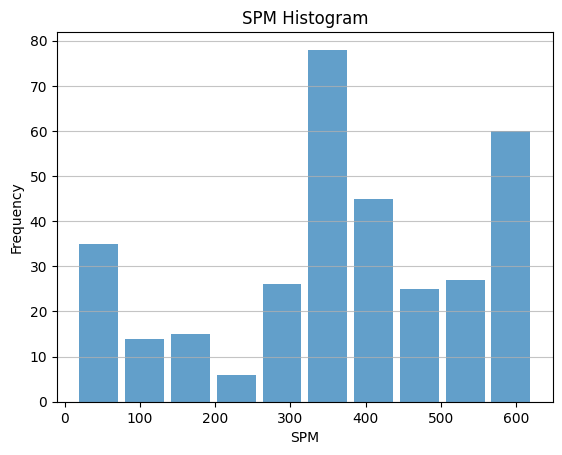

In [32]:
n, bins, patches = plt.hist(x=df['spm'],
                            bins = 'auto',
                            alpha = 0.7,
                            rwidth = 0.85
                           )
plt.title('SPM Histogram')
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('SPM')
plt.ylabel('Frequency')

## Correlations

In [33]:
def ignore_nans(a,b):
    index = ~a.isnull() & ~b.isnull()
    return a[index], b[index]

stats.pearsonr(*ignore_nans(df['smoke'],df['spm']))

(0.9999999999999999, 0.0)

In [37]:
import dython

<Figure size 1200x600 with 0 Axes>

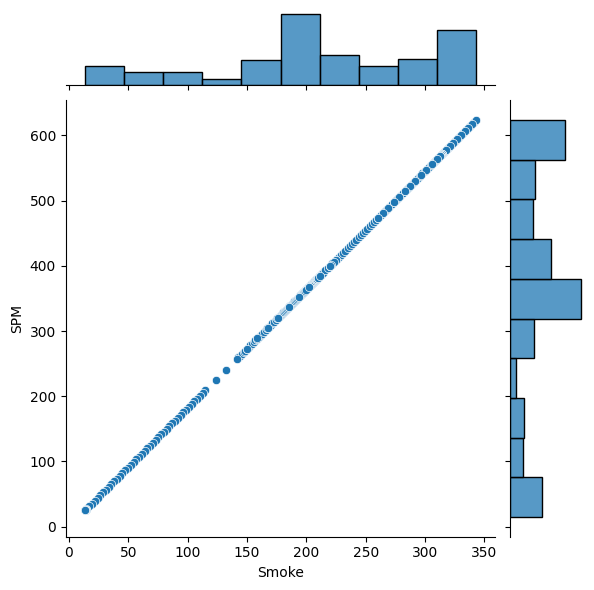

In [43]:
plt.figure(figsize=(12, 6))
sns.jointplot(
    x='smoke', y='spm',
    edgecolor='white',
    data=df
)
plt.xlabel('Smoke')
plt.ylabel('SPM');

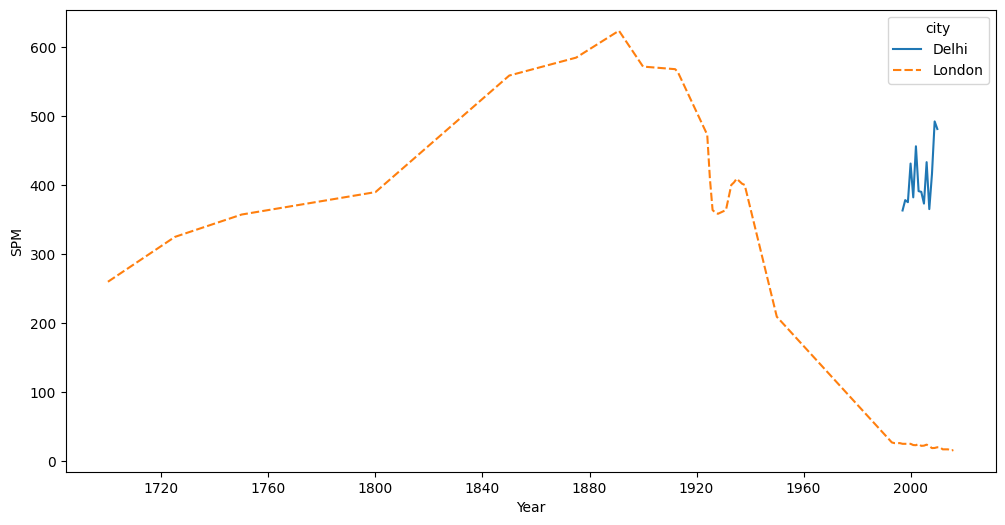

In [45]:
pollution = df.pivot("Year", "city", "spm")
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution)
plt.ylabel('SPM');

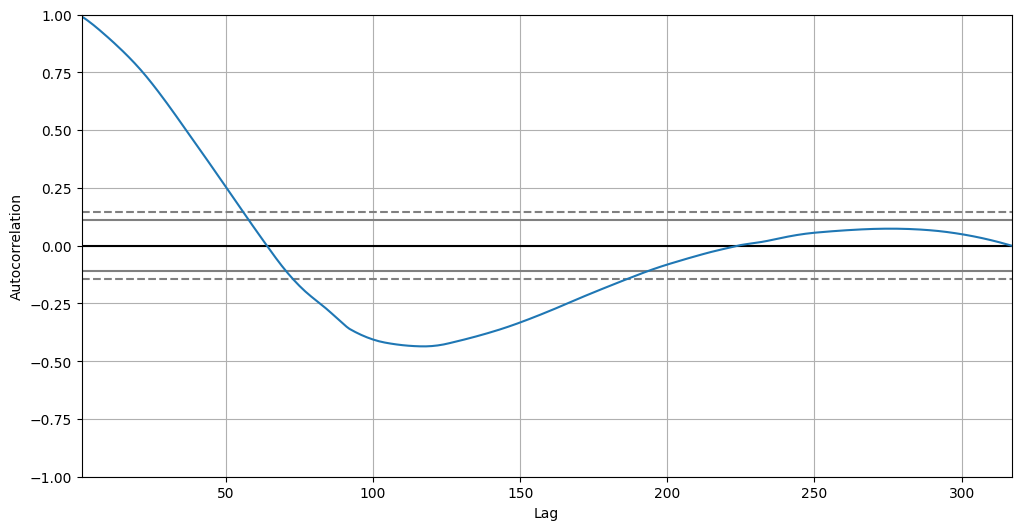

In [48]:
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(pollution['London']);